<a href="https://colab.research.google.com/github/skizzle010/EDA-Theory-DA-21BDS0180/blob/main/21BDS0180_Theory_DA_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Utkarsh Rai



21BDS0180

Exploratory Data Analysis- Theory Assignment

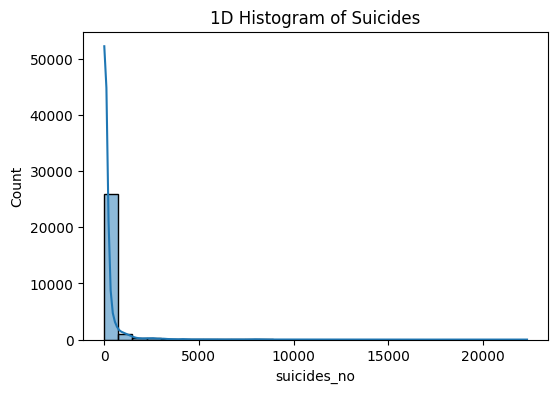

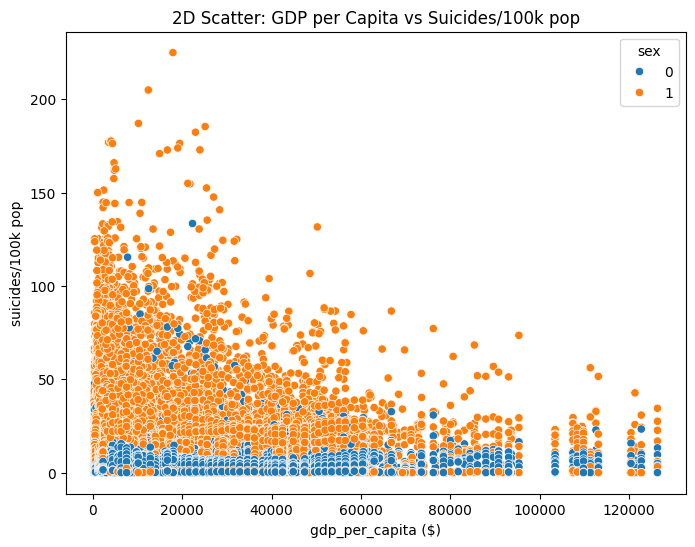

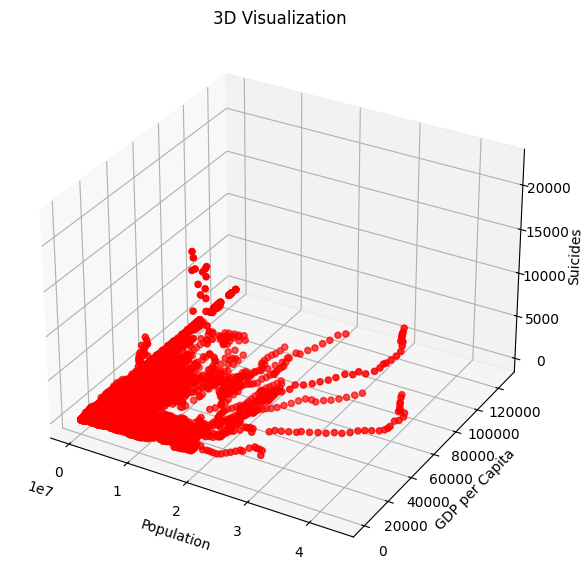

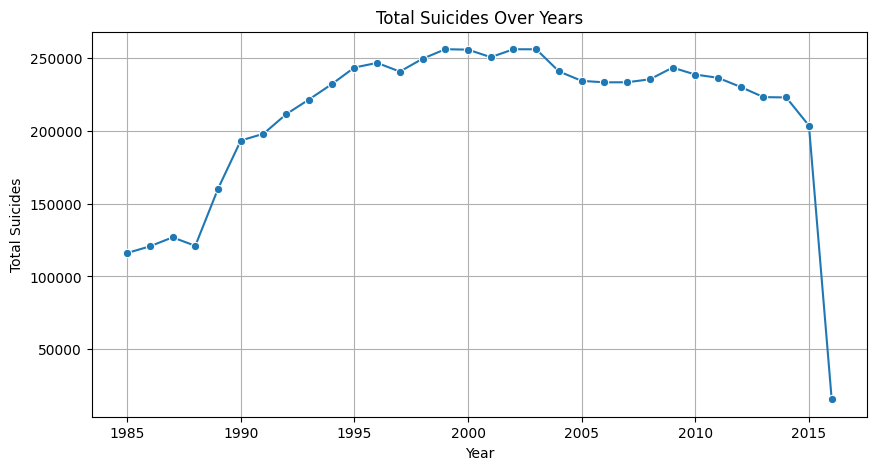

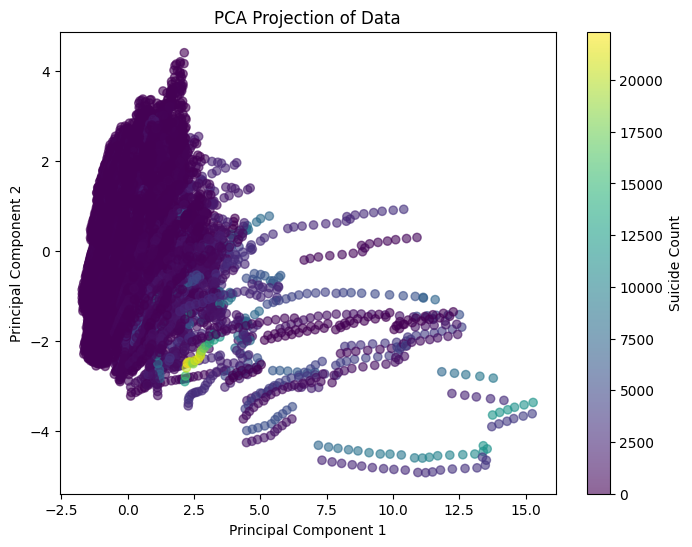

Mean Squared Error: 5221.16
R-squared: 0.99


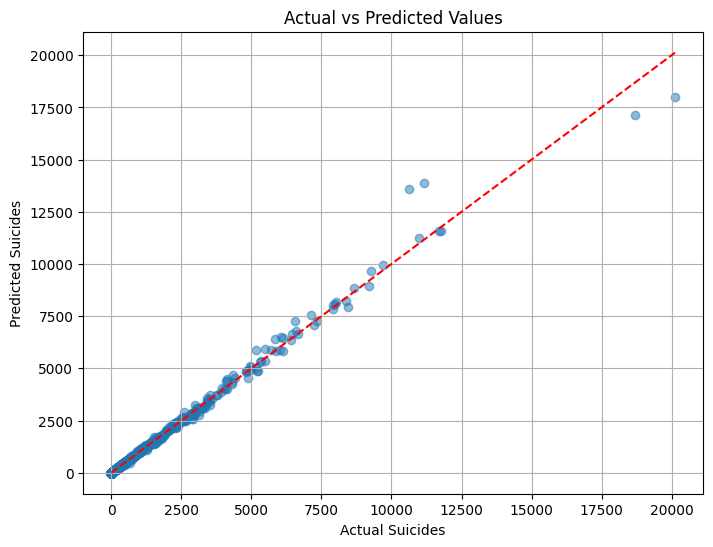

In [6]:
#Utkarsh Rai
#21BDS0180
#Dataset Name - Suicide Dataset.csv

# IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D

# LOAD & CLEAN DATA
df = pd.read_csv("Suicide data.csv")
df.columns = df.columns.str.strip()
df.drop(columns=["HDI for year", "country-year"], inplace=True)
df['gdp_for_year ($)'] = df['gdp_for_year ($)'].str.replace(',', '').astype(float)
df.dropna(inplace=True)

# ENCODING
label_encoders = {}
for col in ['country', 'sex', 'age', 'generation']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 1D VISUALIZATION
plt.figure(figsize=(6, 4))
sns.histplot(df['suicides_no'], bins=30, kde=True)
plt.title("1D Histogram of Suicides")
plt.show()

# 2D VISUALIZATION
plt.figure(figsize=(8, 6))
sns.scatterplot(x='gdp_per_capita ($)', y='suicides/100k pop', data=df, hue='sex')
plt.title("2D Scatter: GDP per Capita vs Suicides/100k pop")
plt.show()

# N-D (3D) VISUALIZATION
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['population'], df['gdp_per_capita ($)'], df['suicides_no'], c='r')
ax.set_xlabel('Population')
ax.set_ylabel('GDP per Capita')
ax.set_zlabel('Suicides')
plt.title("3D Visualization")
plt.show()

# TIME SERIES ANALYSIS
if 'year' in df.columns:
    df_yearly = df.groupby('year')['suicides_no'].sum().reset_index()
    plt.figure(figsize=(10, 5))
    sns.lineplot(x='year', y='suicides_no', data=df_yearly, marker='o')
    plt.title("Total Suicides Over Years")
    plt.xlabel("Year")
    plt.ylabel("Total Suicides")
    plt.grid(True)
    plt.show()

# DIMENSIONALITY REDUCTION (PCA)
X = df.drop(columns=['suicides_no'])
y = df['suicides_no']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection of Data')
plt.colorbar(label='Suicide Count')
plt.show()

# MODEL BUILDING (RANDOM FOREST REGRESSOR)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# MODEL EVALUATION
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# ACTUAL vs PREDICTED PLOT
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Suicides')
plt.ylabel('Predicted Suicides')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()
